In [43]:
from turtle import color

In [44]:
import numpy as np


In [45]:
import matplotlib.pyplot as plt


In [46]:
from scipy.stats import multivariate_normal

In [47]:
from mpl_toolkits.mplot3d import Axes3D

In [48]:
np.set_printoptions(threshold=np.inf)

In [49]:
plt.rcParams['figure.figsize'] = [9,9]

In [50]:
N_features = 4            # Number of features
N_Samples = 10000         # Number of Samples
N_labels = 2  

In [51]:
# Mean vectors
mean_matrix = np.ones(shape=[N_labels, N_features])
mean_matrix [0, :] = [-1,-1,-1,-1]

In [52]:
# Covariance matrices
covariance_matrix = np.ones(shape=[N_labels, N_features, N_features])            
covariance_matrix [0, :, :] = [[2, -0.5, 0.3, 0],[-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0, 0, 0, 2]]
covariance_matrix [1, :, :] = [[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0, 0, 3]]

In [53]:
#Seed to obtain same results for random numbers
np.random.seed(10)

In [54]:
# Class Priors and assigning labels
priors = [0.65, 0.35] 
label = (np.random.rand(N_Samples) >= priors[1]).astype(int)

In [55]:
# Generate gaussian distribution for 10000 samples using mean and covariance matrices for each label
X = np.zeros(shape = [N_Samples, N_features])
for i in range(N_Samples): 
        if (label[i] == 0):
                X[i, :] = np.random.multivariate_normal(mean_matrix[0, :], covariance_matrix[0, :,:])
        elif (label[i] == 1):
                X[i, :] = np.random.multivariate_normal(mean_matrix[1, :], covariance_matrix[1, :,:])

In [56]:
# Compute discriminant score using class conditional PDF
GaussPDF0 = np.log(multivariate_normal.pdf(X,mean = mean_matrix[0, :], cov = covariance_matrix[0, :,:]))
GaussPDF1 = np.log(multivariate_normal.pdf(X,mean = mean_matrix[1, :], cov = covariance_matrix[1, :,:]))
discrim_score = GaussPDF1 - GaussPDF0

In [57]:
# Sort tau values to navigate from minimum to maximum value
sorted_tau = np.sort(discrim_score)
tau_sweep = []


In [58]:
# Calculate mid-points which will be used as threshold values
for i in range(0,9999):
        tau_sweep.append((sorted_tau[i] + sorted_tau[i+1])/2.0)

In [59]:
# Array initialization for results
decision = []
TP = [None] * len(tau_sweep)
FP = [None] * len(tau_sweep)
minPerror = [None] * len(tau_sweep)

In [60]:
# Classify for each threshold and compute error and evaluation metrics
for (index, tau) in enumerate(tau_sweep):
        decision = (discrim_score >= tau)
        TP[index] = (np.size(np.where((decision == 1) & (label == 1))))/np.size(np.where(label == 1))
        FP[index] = (np.size(np.where((decision == 1) & (label == 0))))/np.size(np.where(label == 0))
        minPerror[index] = (priors[0] * FP[index]) + (priors[1] * (1 - TP[index]))

In [61]:
# Theoretical classification based on class priors
loggamma_ideal = np.log(priors[0] / priors[1])
ideal_decision = (discrim_score >= loggamma_ideal)
TP_ideal = (np.size(np.where((ideal_decision == 1) & (label == 1))))/np.size(np.where(label == 1))
FP_ideal = (np.size(np.where((ideal_decision == 1) & (label == 0))))/np.size(np.where(label == 0))
minPerror_ideal = (priors[0] * FP_ideal) + (priors[1] * (1 - TP_ideal))
print("Gamma Ideal - %f and corresponding minimum error %f" %(np.exp(loggamma_ideal), minPerror_ideal))


Gamma Ideal - 1.857143 and corresponding minimum error 0.031358


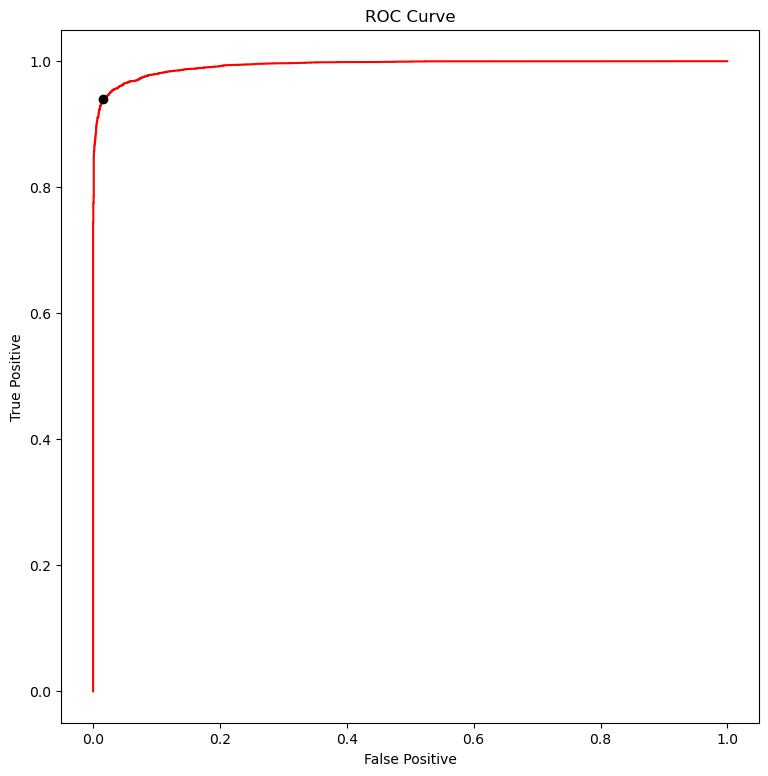

In [62]:
# Plot ROC curve
plt.plot(FP, TP, color = 'red')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.plot(FP[np.argmin(minPerror)], TP[np.argmin(minPerror)],'o',color = 'black')
plt.show()

In [63]:
print("Gamma Practical - %f and corresponding minimum error %f" %(np.exp(tau_sweep[np.argmin(minPerror)]), np.min(minPerror)))

Gamma Practical - 1.800646 and corresponding minimum error 0.031138


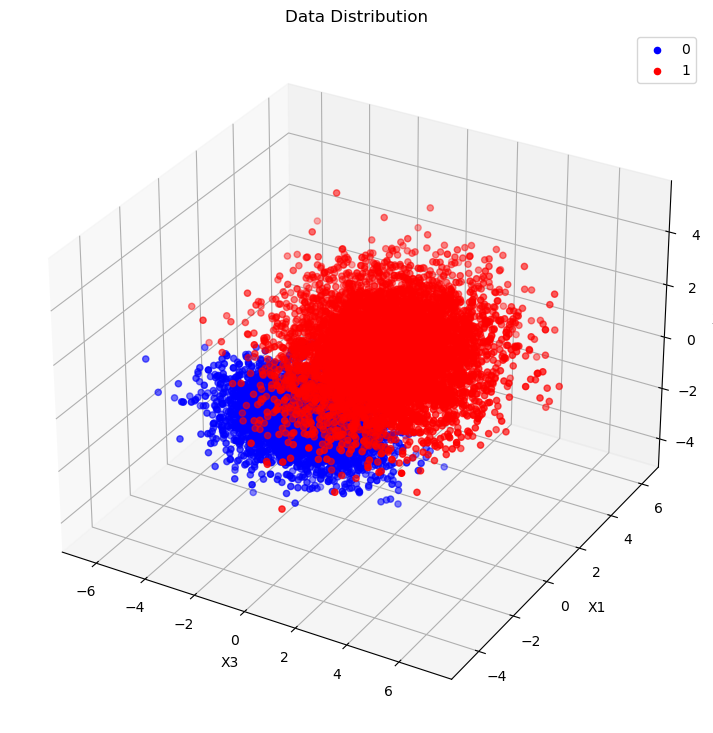

In [64]:
#Plot Data Distribution
fig = plt.figure()
ax = plt.axes(projection = "3d")
Class0 = ax.scatter(X[(label==0),3],X[(label==0),1],X[(label==0),2],'+',color ='blue', label="0")
Class1 = ax.scatter(X[(label==1),3],X[label==1,1],X[label==1,2],'.',color = 'red', label="1")
plt.xlabel('X3')
plt.ylabel('X1')
ax.set_zlabel('X2')
ax.legend()
plt.title('Data Distribution')
plt.show()